In [3]:
import geopandas as gpd
import pandas as pd

Todo
- convert all geojson files into 1 geodataframe 
- data cleaning
- clip the inputs onto the map layer, similar to getting the intersection between the points and the map layer
- return the output onto a file
- write documentation in this notebook if necessary

In [4]:
df = pd.read_csv('data/csv/paranaque_saved_coordinates.csv')
df

,X,Y
0,121.063921,14.614663
1,121.064446,14.600894
2,121.065477,14.564086
3,121.086113,14.604067
4,121.087190,14.592970
...,...,...
230,121.084332,14.574842
231,121.083769,14.560390
232,121.083763,14.545515
233,121.084079,14.541791


In [5]:
geometry = gpd.points_from_xy(df['X'], df['Y'], crs="EPSG:4326")
street_points = gpd.GeoDataFrame(geometry=geometry)  
street_points

,geometry
0,POINT (121.06392 14.61466)
1,POINT (121.06445 14.60089)
2,POINT (121.06548 14.56409)
3,POINT (121.08611 14.60407)
4,POINT (121.08719 14.59297)
...,...
230,POINT (121.08433 14.57484)
231,POINT (121.08377 14.56039)
232,POINT (121.08376 14.54551)
233,POINT (121.08408 14.54179)


<AxesSubplot: >

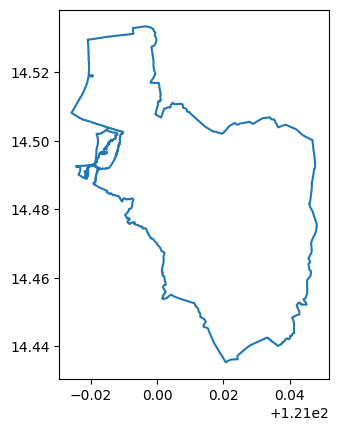

In [6]:
philippines = gpd.read_file('maps/phl_admbnda_adm3_psa_namria_20231106.zip')

paranaque = philippines[philippines['ADM3_EN'] == 'City of Parañaque']
paranaque.boundary.plot()

<AxesSubplot: >

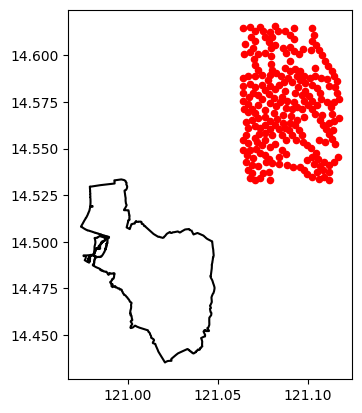

In [8]:
base = paranaque.boundary.plot(edgecolor='black')
street_points.plot(ax=base, markersize=20, color='red')